**Quiz 1**

https://www.dsprelated.com/showquiz/3

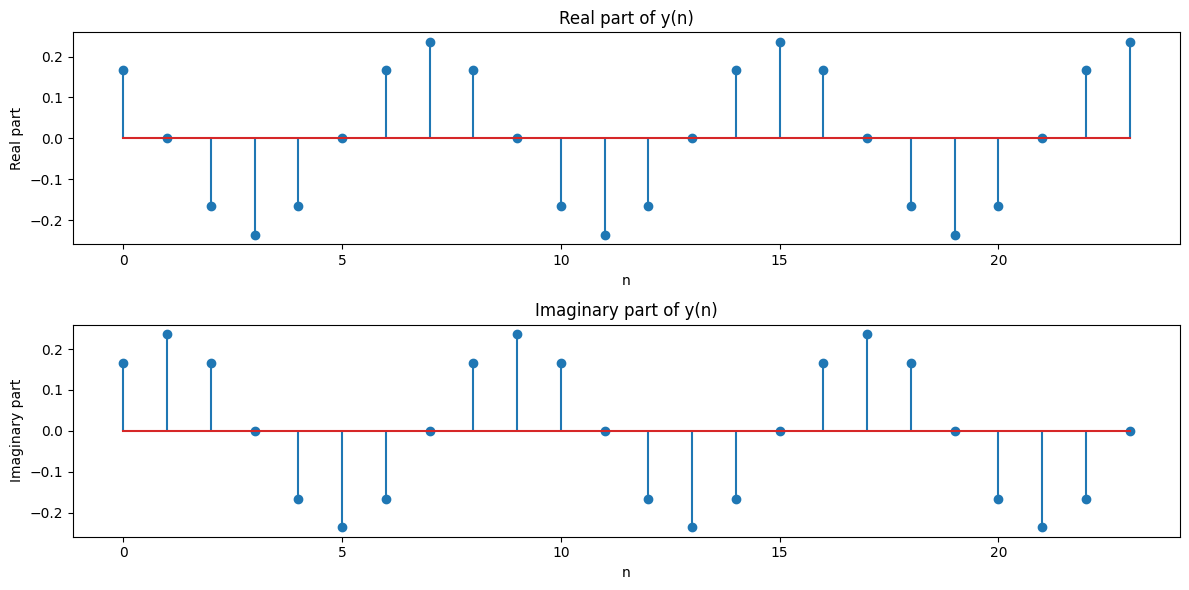

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dfs(xn, N):
    """
    Computes Discrete Fourier Series (DFS)
    
    Parameters:
    xn : array_like
        One period of periodic signal over 0 <= n <= N-1
    N : int
        Fundamental period of xn
    
    Returns:
    Xk : ndarray
        DFS coefficient array over 0 <= k <= N-1
    """
    n = np.arange(N)
    k = np.arange(N)
    WN = np.exp(-1j * 2 * np.pi / N)
    nk = np.outer(n, k)
    WNnk = WN ** nk
    Xk = np.dot(xn, WNnk)
    return Xk

def idfs(Xk, N):
    """
    Computes Inverse Discrete Fourier Series (IDFS)
    
    Parameters:
    Xk : array_like
        DFS coefficient array over 0 <= k <= N-1
    N : int
        Fundamental period of Xk
    
    Returns:
    xn : ndarray
        One period of periodic signal over 0 <= n <= N-1
    """
    n = np.arange(N)
    k = np.arange(N)
    WN = np.exp(-1j * 2 * np.pi / N)
    nk = np.outer(n, k)
    WNnk = WN ** (-nk)
    xn = np.dot(Xk, WNnk) / N
    return xn

def pad(Xk, N):
    """
    Pads the DFS coefficients with zeros
    
    Parameters:
    Xk : array_like
        DFS coefficient array
    N : int
        Number of zeros to pad
    
    Returns:
    xn : ndarray
        Padded array
    """
    return np.concatenate([Xk, np.zeros(N, dtype=complex)])

def plotdfs(Xk):
    """
    Plots the magnitude of the DFS coefficients
    
    Parameters:
    Xk : array_like
        DFS coefficient array
    """
    N = len(Xk)
    k = np.arange(-N//2, N//2)
    magXk = np.abs(np.fft.fftshift(Xk))
    plt.plot(k, magXk)
    plt.axis([-N//2, N//2, -0.5, 5.5])
    plt.xlabel("k")
    plt.ylabel("Xtilde(k)")
    plt.title("Discrete Fourier Transform (DFT)")
    plt.show()

# Main process
x = np.array([1+1j, 1-1j, -1-1j, -1+1j])
Xm = dfs(x, 4)
Ym = pad(Xm, 20)
y = idfs(Ym, 24)

# Plot real and imaginary parts of y(n)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(np.arange(24), np.real(y))
plt.title('Real part of y(n)')
plt.xlabel('n')
plt.ylabel('Real part')

plt.subplot(2, 1, 2)
plt.stem(np.arange(24), np.imag(y))
plt.title('Imaginary part of y(n)')
plt.xlabel('n')
plt.ylabel('Imaginary part')

plt.tight_layout()
plt.show()

dfsy = dfs(y, 24)
plotdfs(dfsy)


Given that the magnitude of Y(m) contains only one non zero component at m=3, the resulting sequence will be a complex exponential sequence corresponding to the frequency component at m=3 over the 24-point length. 

The frequency component can be found from the position of the non zero DFT coefficient. 
For m=3: 
f=3/24 = 1/8 cycles per samples

This correspond to a positive frequency complex valued exponential sequence. 

Observing the first five y(n) samples on a complex plane, y(n) is a positive frequency exponential sequence and the angles of the samples increase in the positive angular direction. 

**Quiz 2**

https://www.dsprelated.com/showquiz/5


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f0 = 3
N = 23
n = np.arange(N)
phase_shift = -6.5 * np.pi / 11

# Define the time-domain sequence x(n)
x_n = np.cos(2 * np.pi * f0 * n / N + phase_shift)

# Compute the DFT of the sequence x(n)
X_m = np.fft.fft(x_n)
X_m_magnitude = np.abs(X_m)

# Calculate the period P
P = N / f0
print('Period: ', P)
# Check periodicity within the sequence
def is_time_domain_periodic(x, P):
    P = int(P)  # Period should be an integer
    for i in range(N - P):
        if not np.allclose(x[i], x[i + P]):
            return False
    return True

# Periodicity check
is_periodic = is_time_domain_periodic(x_n, P)

# Plot the time-domain sequence
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.stem(n, x_n)
plt.title("Time-Domain Sequence x(n)")
plt.xlabel("n")
plt.ylabel("x(n)")

# Plot the DFT magnitude
plt.subplot(2, 2, 2)
plt.stem(np.arange(N), X_m_magnitude)
plt.title("DFT Magnitude |X(m)|")
plt.xlabel("m")
plt.ylabel("|X(m)|")

# Highlight non-zero components in DFT
plt.subplot(2, 2, 3)
plt.stem(np.arange(N), X_m_magnitude)
plt.title("Non-Zero DFT Components")
plt.xlabel("m")
plt.ylabel("|X(m)|")

# Show the period and periodicity result
plt.subplot(2, 2, 4)
plt.text(0.1, 0.5, f'Period T = {P:.3f}\nIs Periodic: {is_periodic}', fontsize=12)
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

Period:  7.666666666666667


Even though x1(n) contains exactly three sinusoidal cycles and its DFT has only two non zero spectral components, x1(n) is not time periodic. 
The sequence does not contain repeating sample values. 

An N sample discrete sinusoid is only time periodic if tis period P is an integer number of samples/cycle with P less than N. 
In this case the period T is calculated as the ration N/f0 which is 7.667 samples/cycle which is not an integer. 





**Quiz 3** 

https://www.dsprelated.com/showquiz/6

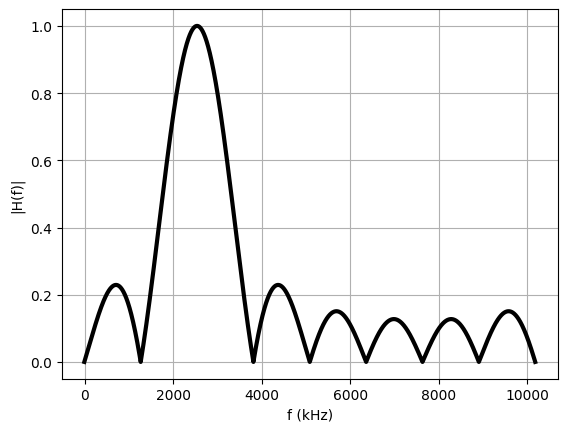

Norm difference: 15.591582682790456


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter
from scipy.fftpack import fftshift

# Parameters
N = 8
fs = 8000
nsamples = 1000

# Generate the FFT matrix
WN = np.fft.fft(np.eye(N))

# Generate random input signal
x = np.random.randn(nsamples)

# Initialize input and output vectors
x_in = np.zeros(N)
y = np.zeros(nsamples)

# Process the input signal through the system
for n in range(nsamples):
    x_in = np.concatenate(([x[n]], x_in[:N-1]))  # Insert the new sample at the start
    x_out = np.dot(WN, x_in)
    y[n] = np.abs(x_out[2]) / N  # Taking the magnitude of the third element

# Compute the filter coefficients
h = WN[2, :] / N

# Verify the norm difference
norm_diff = np.linalg.norm(y - lfilter(np.abs(h), 1, x)) 

# Calculate the frequency response
w, H = freqz(h, 1, worN=int(1e6), whole=True, fs=fs)

# Plot the frequency response
plt.plot((w - np.pi) * fs / (2 * np.pi * 1000), np.abs(fftshift(H)), 'k', linewidth=3)
plt.xlabel('f (kHz)')
plt.ylabel('|H(f)|')
plt.grid(True)
plt.show()

print("Norm difference:", norm_diff)


When the first element of the input vector correspond to the least recent sample, the k-th DFT bin corresponds to the digital frequency f= fs k/N. 
In thi case the most recent sample is in the first element, hence, the k-th bin correspond to f=(N-k) fs/N. 

For this case considering the data of the problem, f = -2kHz and this frequency response is shown above. 


**Quiz 4**

https://www.dsprelated.com/showquiz/8

In [25]:
import numpy as np

# Parameters
N = 50
n = np.arange(N)

# Define the sequence x(n)
x = 10 * np.cos(2 * np.pi * n / N)

y_n = np.zeros_like(x)

# Implementing the Trapezoidal Rule network
for i in range(1, len(x)):
    y_n[i] = y_n[i-1] + 0.5 * (x[i] + x[i-1])

# The final value of y_n should be the estimate of the integral
integral_estimate = y_n[-1]
integral_estimate


-9.960573506572363

**Quiz 5**

https://www.dsprelated.com/showquiz/10

The correct explanation is that the time delay for a single sine wave at f0 through a nonlinear phase filter is determined by the phase response at that frequency, not by the group delay. 
The phase response at 200 Hz is 0 radians as show in the figure below. Consequently, the time delay is zero seconds. 
Thus, the time delay between the filter's input 200 Hz sine wave and the output 200 Hz sine wave is: 0 seconds. 
If a 200 Hz sine wave sequence is applie dto the input of the filter, it is clear that there is no time dalay between the input and the output.  



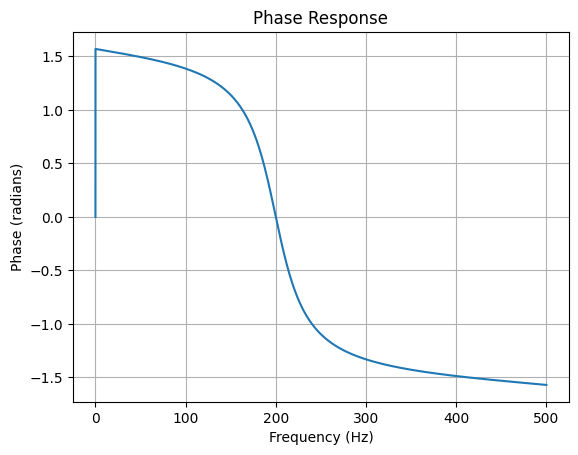

Phase response at 200 Hz: 1.0239733851663822e-08 radians


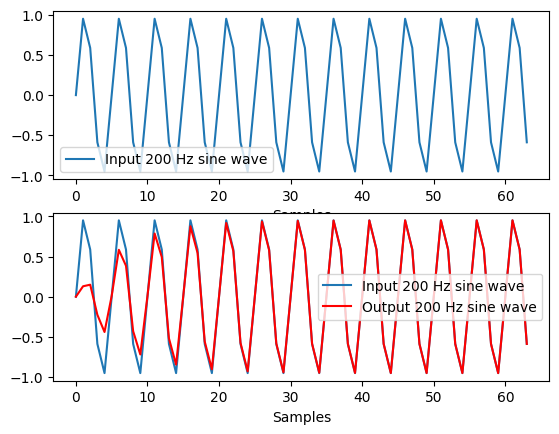

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter

# Define the filter coefficients
b = [0.136728736, 0, -0.136728736]
a = [1, -0.53353098, 0.726542528]

# Sample rate
fs = 1000  # samples per second

# Frequency response
w, h = freqz(b, a, worN=8000)

# Convert frequency to Hz
frequencies = w * fs / (2 * np.pi)

# Phase response
phase_response = np.angle(h)

# Plotting the phase response
plt.figure()
plt.plot(frequencies, phase_response)
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.show()

# Find the phase at 200 Hz
index_200Hz = np.argmin(np.abs(frequencies - 200))
phase_at_200Hz = phase_response[index_200Hz]

print(f'Phase response at 200 Hz: {phase_at_200Hz} radians')

# Generate a 200 Hz sine wave
num_samples = 64
t = np.arange(num_samples)
x = np.sin(2 * np.pi * 200 * t / fs)

# Apply the filter to the sine wave
y = lfilter(b, a, x)

# Plot the input and output signals
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Input 200 Hz sine wave')
plt.legend()
plt.xlabel('Samples')
plt.subplot(2, 1, 2)
plt.plot(t, x, label='Input 200 Hz sine wave')
plt.plot(t, y, label='Output 200 Hz sine wave', color='r')
plt.legend()
plt.xlabel('Samples')
plt.show()


**Quiz 6**

https://www.dsprelated.com/showquiz/11


y1(n) = cos(2pikn/N) X(n) - cos(2pik(n-N)/N) x(n-N) 
      = cos(2pikn/N) x(n) - cos(2pikn/N) x(n-N) 
      = cos(2pikn/N) [x(n) - x(n-N)] = y2(n) 

y2(n) =  cos(2pikn/N) [x(n) - x(n-N)] = y2(n) = y1(n) 

When k is an integer:
- the cosine function becomes periodic with a period of N samples and cos(2pikn/N) = cos(2pik(n-N)/N) 
- tem multiplication by this periodic function can be seen as a modulation that does not affect the linearity and time invariance of the overall system when integrated with the LTI stage. 

Therefore the correct condition under which it is possible to swap the order of the stages such that y1(n) = y2(n) is when k is an integer. 
